# Train a single ML model for all resolutions with first order gradients

In [2]:
import sys
sys.path.append('../modules/')

%reload_ext autoreload
%autoreload 2
import datasets
import ML_classes

In [3]:
import matplotlib.pyplot as plt

In [4]:
M2LINES_BUCKET ='gs://leap-persistent/dhruvbalwada/m2lines_transfer'
L = 'all'

ML_data = datasets.MITgcm_all_transformer('-', L)

In [5]:
ML_data.read_datatree(M2LINES_BUCKET)
ML_data.generate_test_train_batches()

Dataset loaded from gs://leap-persistent/dhruvbalwada/m2lines_transfer/ML_data/ds_ML_50km_3D
Centered
Dataset loaded from gs://leap-persistent/dhruvbalwada/m2lines_transfer/ML_data/ds_ML_100km_3D
Centered
Dataset loaded from gs://leap-persistent/dhruvbalwada/m2lines_transfer/ML_data/ds_ML_200km_3D
Centered
Dataset loaded from gs://leap-persistent/dhruvbalwada/m2lines_transfer/ML_data/ds_ML_400km_3D
Centered
Computed and saved norm nc for all.
Test and train batches split. Number of batches: 44-4


In [23]:
# Setup ML model
ANN_model = ML_classes.ANN(num_in = len(ML_data.input_channels))
regress_sys = ML_classes.RegressionSystem(ANN_model)

regress_sys.train_system(ML_data, 201)

Train loss step 0:  0.9164087609811262 test loss: 0.7362378239631653
Train loss step 20:  0.19147829000245442 test loss: 0.1989212967455387
Train loss step 40:  0.18303183364597234 test loss: 0.18999303877353668
Train loss step 60:  0.17972147769548677 test loss: 0.1860697641968727
Train loss step 80:  0.1774135171012445 test loss: 0.18244599550962448
Train loss step 100:  0.17547442256049675 test loss: 0.18263523653149605
Train loss step 120:  0.17442802746187558 test loss: 0.18125401809811592
Train loss step 140:  0.17337840524586765 test loss: 0.17980727180838585
Train loss step 160:  0.17256458713249725 test loss: 0.17869697138667107
Train loss step 180:  0.1718747080727057 test loss: 0.1778995580971241
Train loss step 200:  0.1714220941066742 test loss: 0.17746740207076073


NameError: name 'plt' is not defined

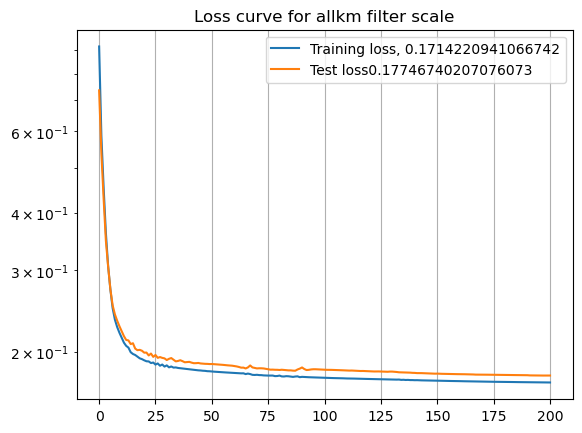

In [25]:
## Loss plot
plt.plot(regress_sys.train_loss, label='Training loss, '+str(regress_sys.train_loss[-1]))
plt.plot(regress_sys.test_loss, label='Test loss'+str(regress_sys.test_loss[-1]))

plt.title('Loss curve for '+ L+ 'km filter scale')
plt.grid()
plt.yscale('log')
plt.legend()

plt.savefig('figures/MITgcm_'+L+'km_loss_curve.png')

In [26]:
# Save the checkpoint
CKPT_DIR = '/home/jovyan/mesoscale_buoyancy_param_ML/ML_checkpoints/ckpts_'+L+'_MITgcm'#+'_'+str(bias)
regress_sys.save_checkpoint(CKPT_DIR)

# Save model nc file
model_nc = '/home/jovyan/mesoscale_buoyancy_param_ML/ML_model_ncs/' +'MITgcm_'+L+'.nc'
regress_sys.save_weights_nc(model_nc)